<a href="https://colab.research.google.com/github/AzadehHa/Data-Analytics/blob/main/ExerciseDay13-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/AirQualityUCI2.csv')

# Display the first few rows of the dataset
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Check the percentage of missing values in each column
missing_percentage = data.isnull().sum() / len(data) * 100
print("Percentage of missing values per column:\n", missing_percentage)

# Drop columns with 100% missing values
data = data.loc[:, data.isnull().mean() < 1.0]
print("\nColumns after dropping those with 100% missing values:")
print(data.columns)

# Impute missing values for numeric columns with the column mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Impute missing values for non-numeric columns with 'Unknown'
non_numeric_columns = data.select_dtypes(include=['object']).columns
data[non_numeric_columns] = data[non_numeric_columns].fillna('Unknown')

# Verify missing values are handled
print("\nRemaining missing values after handling:")
print(data.isnull().sum())

# Save the cleaned dataset if needed
data.to_excel('cleaned_data.xlsx', index=False)


Percentage of missing values per column:
 Date               1.203674
Time               1.203674
CO(GT)             1.203674
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)           1.203674
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                  1.203674
RH                 1.203674
AH                 1.203674
Unnamed: 15      100.000000
Unnamed: 16      100.000000
dtype: float64

Columns after dropping those with 100% missing values:
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Remaining missing values after handling:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.

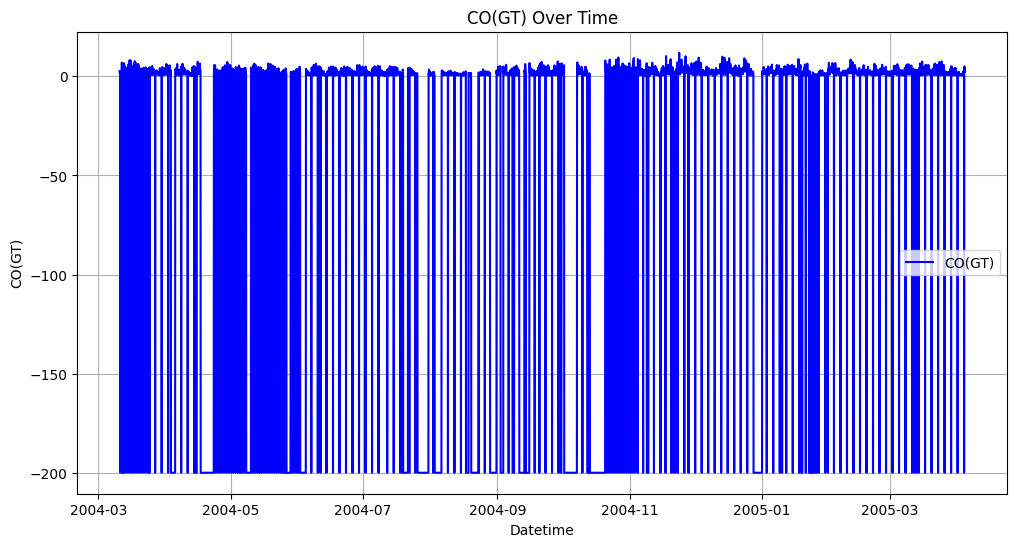

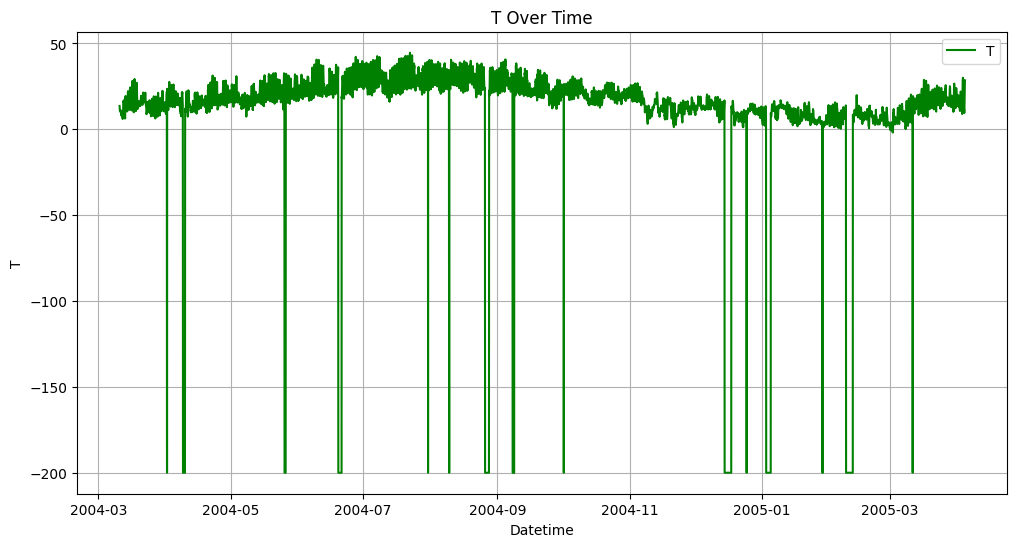

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Select a numeric feature to plot (e.g., 'CO(GT)')
feature = 'CO(GT)'  # Replace with the column name you'd like to visualize

# Plot the time series for the selected feature
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[feature], color='blue', label=feature)
plt.title(f'{feature} Over Time')
plt.xlabel('Datetime')
plt.ylabel(feature)
plt.grid(True)
plt.legend()
plt.show()

# Additional Example: Plotting temperature (T)
feature_temp = 'T'  # Replace with another numeric column name
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[feature_temp], color='green', label=feature_temp)
plt.title(f'{feature_temp} Over Time')
plt.xlabel('Datetime')
plt.ylabel(feature_temp)
plt.grid(True)
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

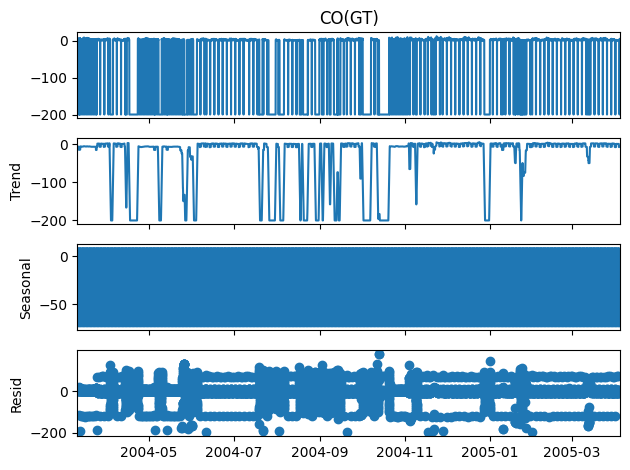

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Select a feature for decomposition (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values for the selected feature
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Perform Additive Decomposition
decomposition = seasonal_decompose(data[feature], model='additive', period=24)  # Adjust period based on data frequency

# Plot the decomposition results
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


For Trend, in this data, an increasing trend in CO(GT) levels might indicate a steady deterioration in air quality due to urbanization or industrial growth.
For Seasonal, spikes in CO(GT) levels during certain months may be tied to weather or societal habits.
For Residual, these variations represent the unpredictable and unstructured part of the series, such as sudden pollution spikes caused by accidents or unexpected weather changes.

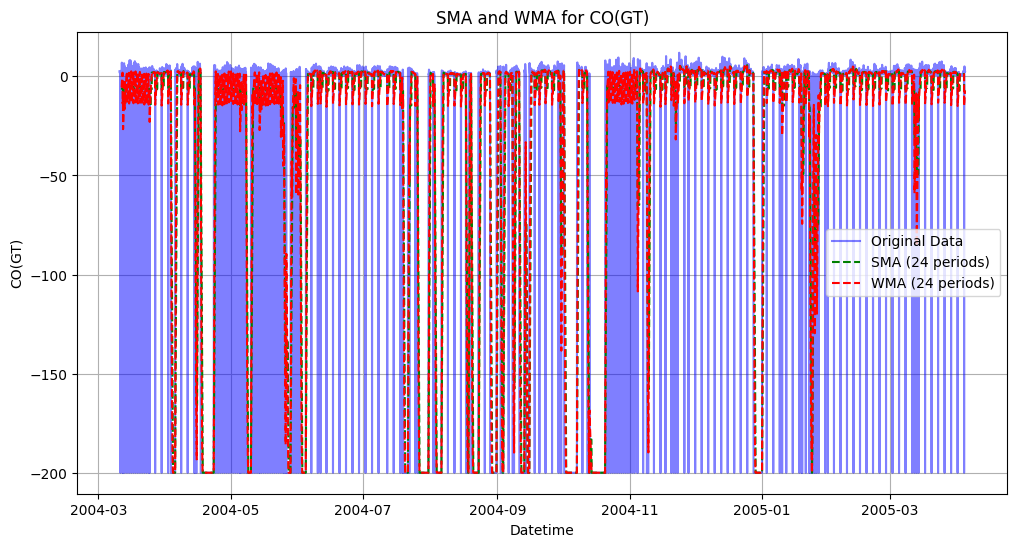

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Select a feature for moving averages (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values for the selected feature
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Apply Simple Moving Average (SMA)
window_size = 24  # Adjust the window size based on your preference
data['SMA'] = data[feature].rolling(window=window_size).mean()

# Apply Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1)  # Increasing weights
data['WMA'] = data[feature].rolling(window=window_size).apply(
    lambda prices: np.dot(prices, weights) / weights.sum(), raw=True
)

# Plot the original data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data[feature], label='Original Data', color='blue', alpha=0.5)
plt.plot(data['SMA'], label=f'SMA ({window_size} periods)', color='green', linestyle='--')
plt.plot(data['WMA'], label=f'WMA ({window_size} periods)', color='red', linestyle='--')
plt.title(f'SMA and WMA for {feature}')
plt.xlabel('Datetime')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


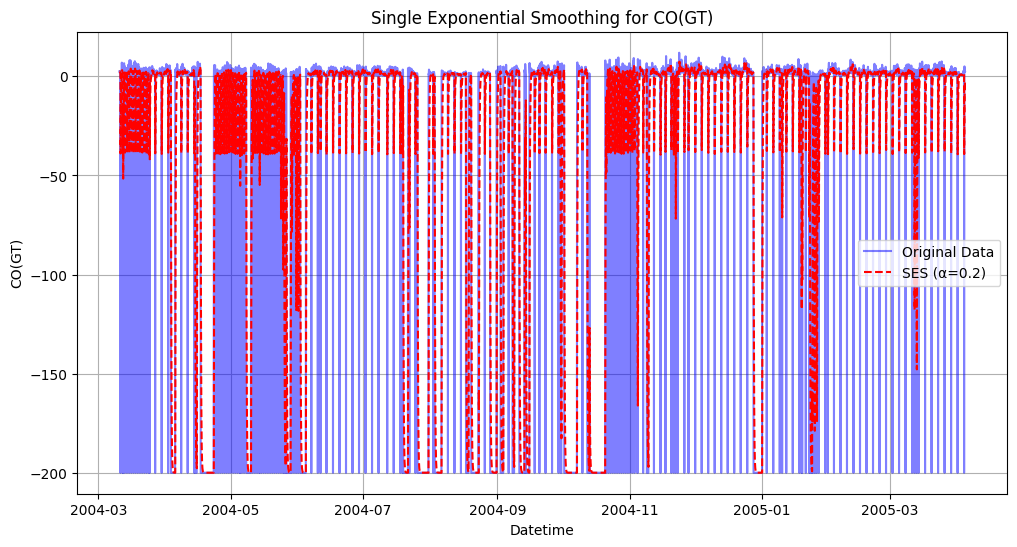

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Select a feature for SES (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values for the selected feature
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Apply Single Exponential Smoothing (SES)
alpha = 0.2  # Smoothing factor; adjust this value to analyze its effect
ses_model = SimpleExpSmoothing(data[feature]).fit(smoothing_level=alpha, optimized=False)
data['SES'] = ses_model.fittedvalues

# Plot the original data and SES smoothed values
plt.figure(figsize=(12, 6))
plt.plot(data[feature], label='Original Data', color='blue', alpha=0.5)
plt.plot(data['SES'], label=f'SES (α={alpha})', color='red', linestyle='--')
plt.title(f'Single Exponential Smoothing for {feature}')
plt.xlabel('Datetime')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
<ipython-input-7-d61043176a9e>:28: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = ExponentialSmoothing(data[feature], trend='add', seasonal=None).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)


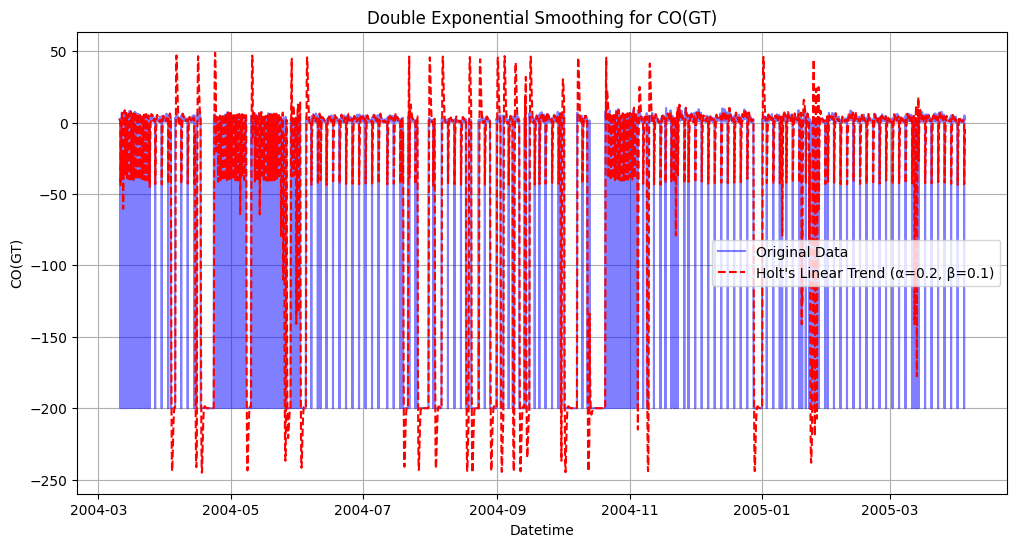

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Select a feature for Double Exponential Smoothing (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values for the selected feature
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Apply Double Exponential Smoothing (Holt’s Linear Trend Model)
alpha = 0.2  # Smoothing factor for level
beta = 0.1   # Smoothing factor for trend
holt_model = ExponentialSmoothing(data[feature], trend='add', seasonal=None).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
data['Holt'] = holt_model.fittedvalues

# Plot the original data and Holt's smoothed values
plt.figure(figsize=(12, 6))
plt.plot(data[feature], label='Original Data', color='blue', alpha=0.5)
plt.plot(data['Holt'], label=f"Holt's Linear Trend (α={alpha}, β={beta})", color='red', linestyle='--')
plt.title(f"Double Exponential Smoothing for {feature}")
plt.xlabel('Datetime')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.show()


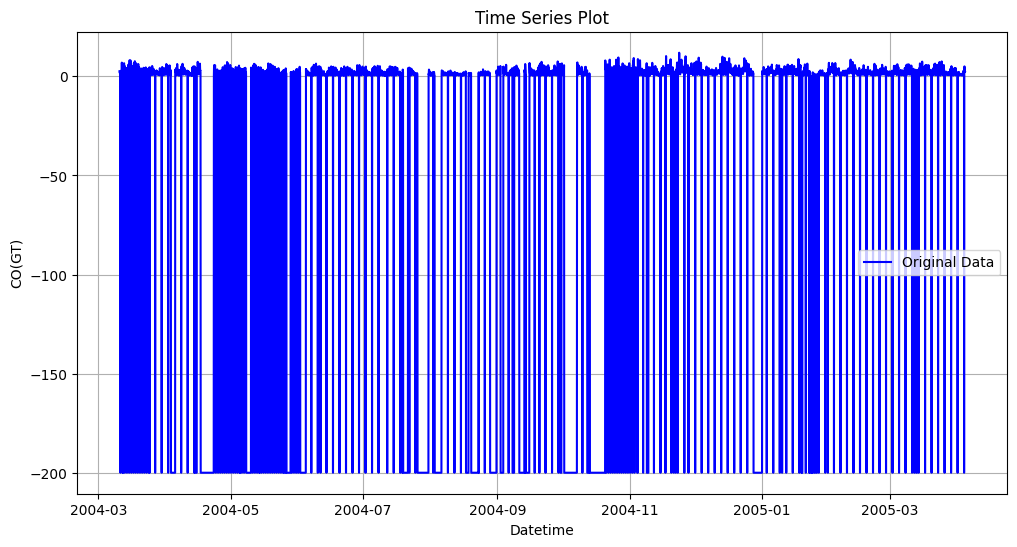

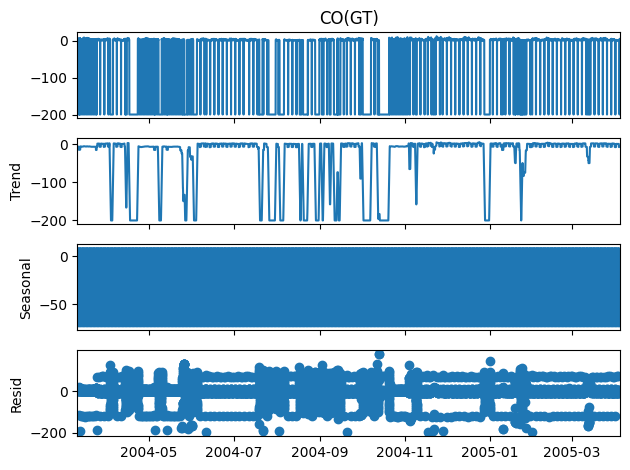

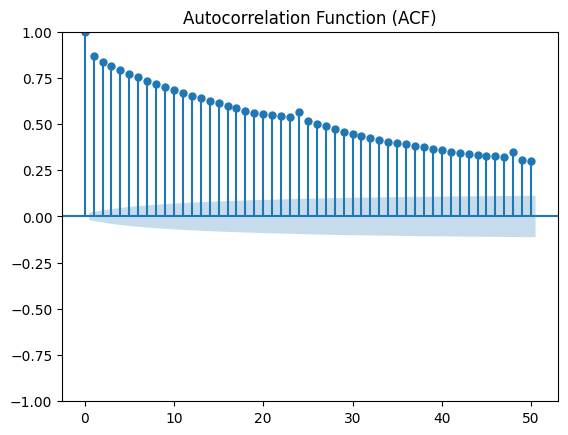

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Select a feature for analysis (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(data[feature], label='Original Data', color='blue')
plt.title('Time Series Plot')
plt.xlabel('Datetime')
plt.ylabel(feature)
plt.grid(True)
plt.legend()
plt.show()

# Decompose the time series to check trend and seasonality
decomposition = seasonal_decompose(data[feature], model='additive', period=24)  # Adjust period for your data
decomposition.plot()
plt.show()

# Plot the Autocorrelation Function (ACF) to check for seasonality
plot_acf(data[feature].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()


By these result the dataset has both trend and seasonality, so we can apply Triple Exponential Smoothing (Holt-Winters Model).

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


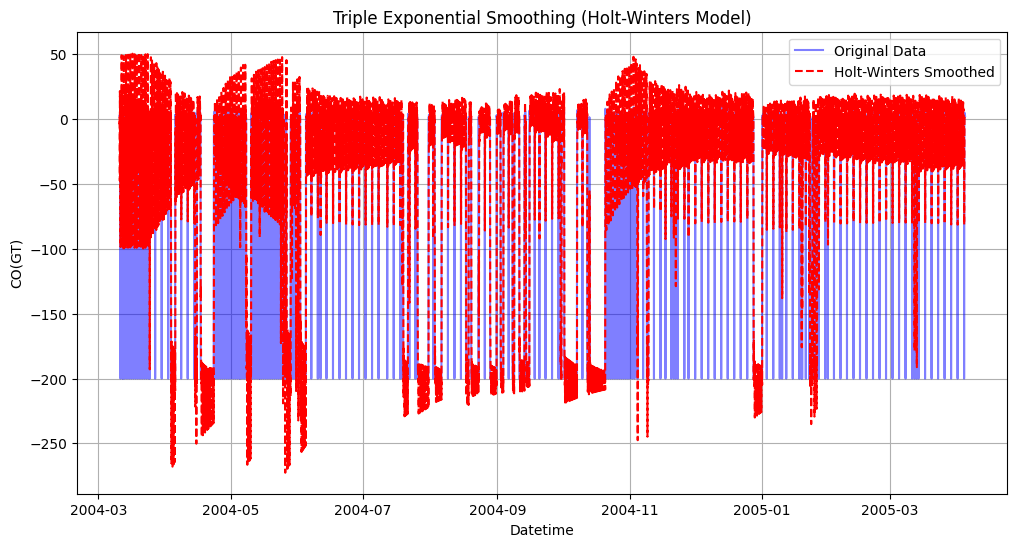

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Triple Exponential Smoothing
model = ExponentialSmoothing(
    data[feature],
    trend='add',
    seasonal='add',
    seasonal_periods=12  # Adjust based on your data's seasonality
).fit()

data['Holt-Winters'] = model.fittedvalues

# Plot the original data and Holt-Winters smoothed values
plt.figure(figsize=(12, 6))
plt.plot(data[feature], label='Original Data', color='blue', alpha=0.5)
plt.plot(data['Holt-Winters'], label="Holt-Winters Smoothed", color='red', linestyle='--')
plt.title("Triple Exponential Smoothing (Holt-Winters Model)")
plt.xlabel('Datetime')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.show()


The comparison of Single Exponential Smoothing (SES), Double Exponential Smoothing (Holt's Linear Trend Model), and Triple Exponential Smoothing (Holt-Winters Model) reveals their varying effectiveness for the given air quality data. SES, with its simplicity, provides a basic smoothing of the CO(GT) feature, capturing overall level changes but potentially missing trend and seasonal patterns. The Holt's Linear Trend Model improves upon SES by incorporating trend, allowing it to better capture the underlying directional movement in the data. However, the Holt-Winters Model demonstrates superior performance by accounting for both trend and seasonality, which are evident in the dataset as shown by the seasonal decomposition and ACF plot. This model's ability to capture the complex patterns in the air quality data, including daily and potentially longer-term seasonal variations, makes it the most effective among the three for this particular dataset. The Holt-Winters model's fitted values appear to closely follow the original data while smoothing out short-term fluctuations, suggesting it provides a good balance between capturing important patterns and reducing noise.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrhxig5a/zwd93agw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrhxig5a/8mdv2a6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94056', 'data', 'file=/tmp/tmpfrhxig5a/zwd93agw.json', 'init=/tmp/tmpfrhxig5a/8mdv2a6h.json', 'output', 'file=/tmp/tmpfrhxig5a/prophet_model2b3w50j0/prophet_model-20241221104327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

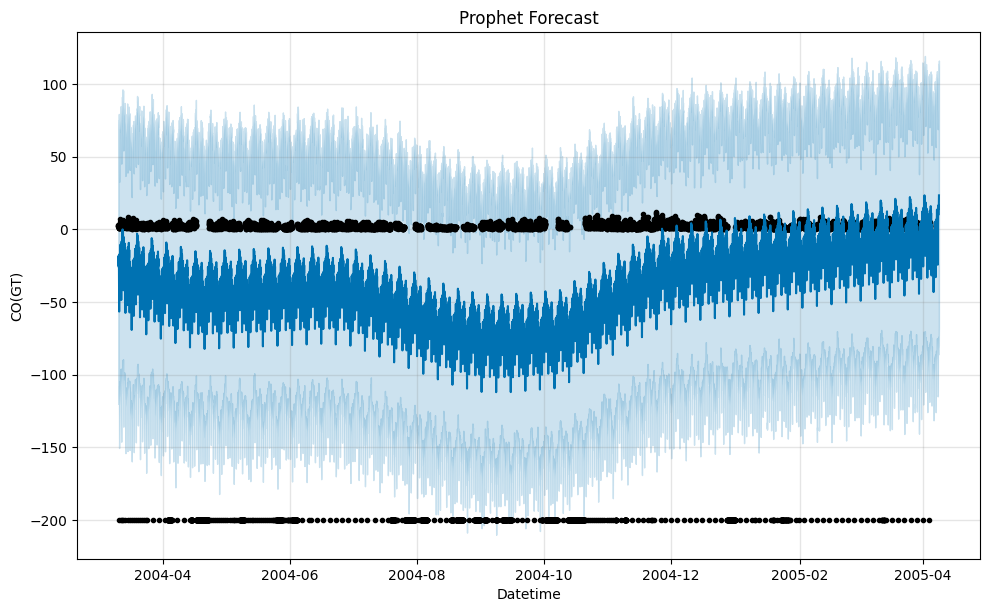

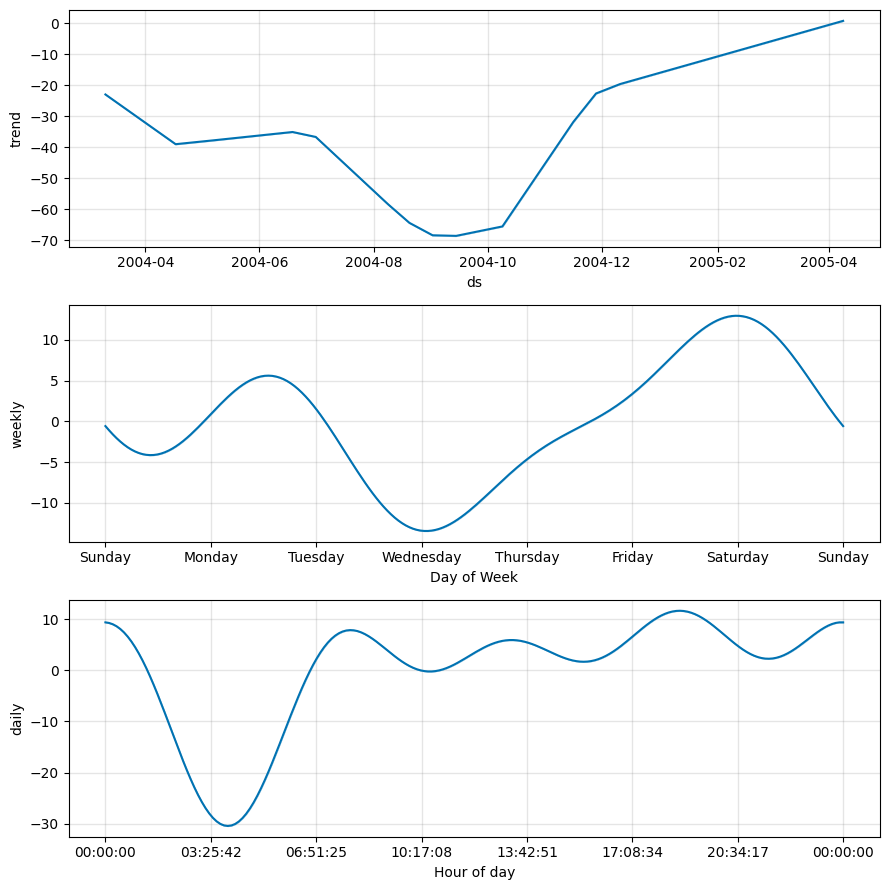

In [10]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Select a feature to forecast (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Prepare data for Prophet
prophet_data = data.rename(columns={'Datetime': 'ds', feature: 'y'})[['ds', 'y']]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=100, freq='H')  # Extend for 100 hours
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Datetime")
plt.ylabel(feature)
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrhxig5a/k67qtxj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrhxig5a/h0j3tz8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38636', 'data', 'file=/tmp/tmpfrhxig5a/k67qtxj0.json', 'init=/tmp/tmpfrhxig5a/h0j3tz8s.json', 'output', 'file=/tmp/tmpfrhxig5a/prophet_model2ks3m8n2/prophet_model-20241221104342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


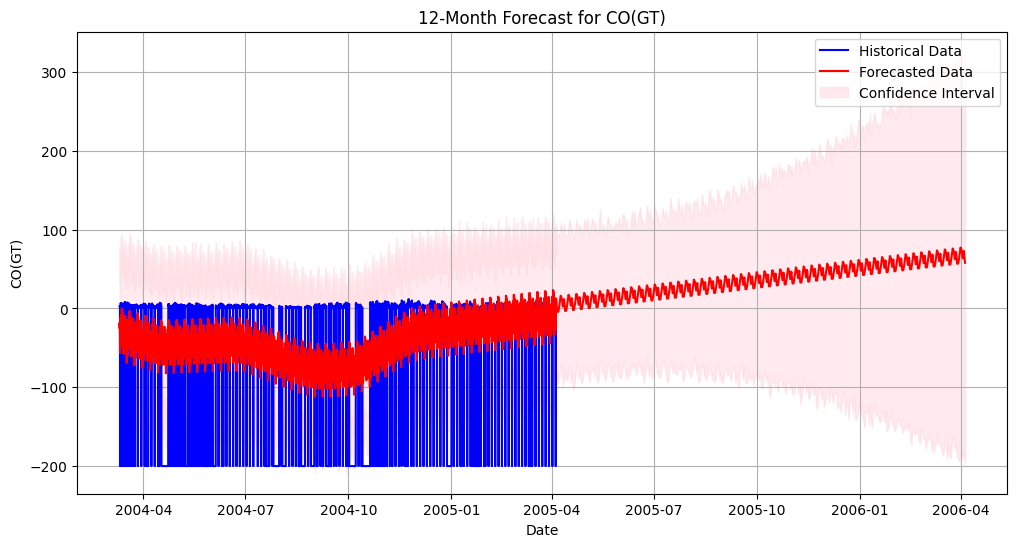

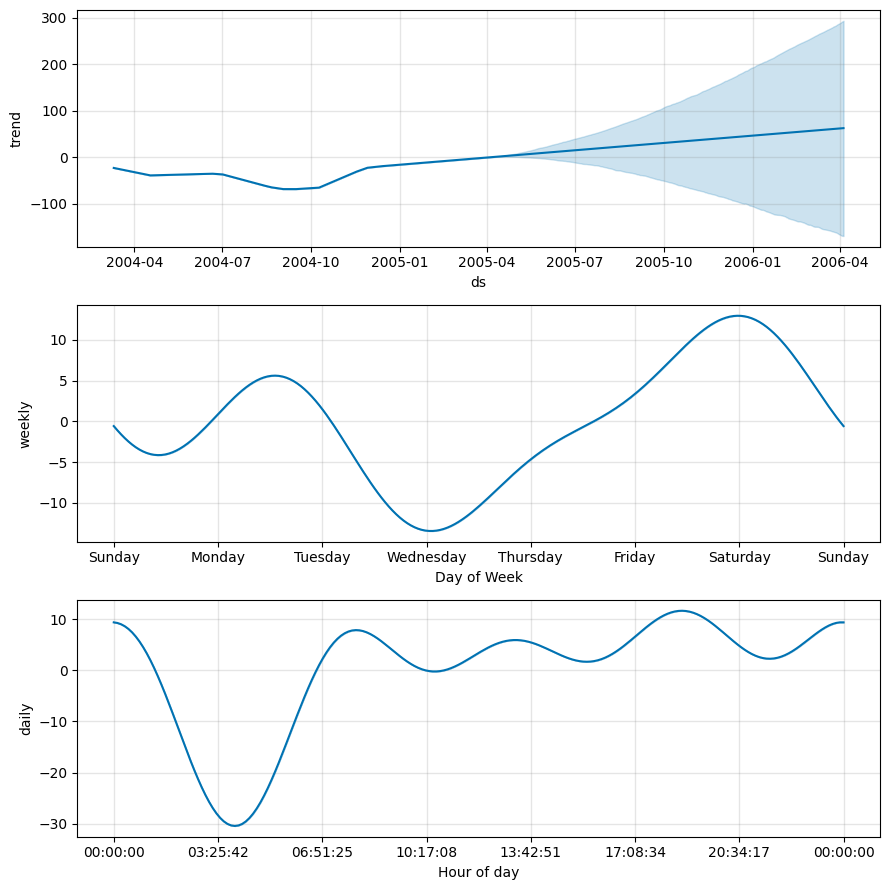

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Select a feature to forecast (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Prepare data for Prophet
prophet_data = data.rename(columns={'Datetime': 'ds', feature: 'y'})[['ds', 'y']]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=365, freq='D')  # Forecast for 12 months (365 days)
forecast = model.predict(future)

# Plot the forecasted values along with historical data
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red')
plt.fill_between(
    forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval'
)
plt.title(f"12-Month Forecast for {feature}")
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.show()

# Plot the forecast components (trend, seasonality, etc.)
model.plot_components(forecast)
plt.show()


The analysis of the air quality dataset using various time series forecasting methods reveals important insights. The data shows clear trends and seasonality, as evidenced by the seasonal decomposition and ACF plot. Single Exponential Smoothing (SES) provides a basic smoothing of the CO(GT) feature, while Double Exponential Smoothing (Holt's Linear Trend Model) captures both level and trend components. However, the Triple Exponential Smoothing (Holt-Winters Model) demonstrates superior performance by accounting for trend and seasonality, which are evident in this dataset. The Prophet forecast further confirms these patterns, showing a slightly increasing trend over time and clear daily and weekly seasonality in CO levels. The forecast also includes an uncertainty interval that widens for long-term predictions, highlighting the complexity of air quality forecasting. These methods collectively provide a comprehensive understanding of the CO(GT) feature's behavior, enabling more accurate predictions and insights into air quality patterns.

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

# Load the dataset
file_path = '/content/AirQualityUCI2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data.set_index('Datetime', inplace=True)

# Select a feature for analysis (e.g., 'CO(GT)')
feature = 'CO(GT)'

# Ensure the data is numeric and drop missing values
data[feature] = pd.to_numeric(data[feature], errors='coerce')
data = data.dropna(subset=[feature])

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[feature][:train_size], data[feature][train_size:]

### Exponential Smoothing Models ###

# Single Exponential Smoothing (SES)
ses_model = ExponentialSmoothing(train, trend=None, seasonal=None).fit()
ses_forecast = ses_model.forecast(len(test))

# Double Exponential Smoothing (Holt)
holt_model = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
holt_forecast = holt_model.forecast(len(test))

# Triple Exponential Smoothing (Holt-Winters)
holt_winters_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=24).fit()
holt_winters_forecast = holt_winters_model.forecast(len(test))

# Calculate Metrics for Exponential Smoothing Models
metrics_exp_smoothing = {}
for model_name, forecast in {
    'SES': ses_forecast,
    'Holt': holt_forecast,
    'Holt-Winters': holt_winters_forecast
}.items():
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    metrics_exp_smoothing[model_name] = {'MAE': mae, 'RMSE': rmse}

### Prophet Model ###

# Prepare data for Prophet
prophet_data = data.reset_index().rename(columns={'Datetime': 'ds', feature: 'y'})[['ds', 'y']]

# Split into train and test sets
train_prophet = prophet_data.iloc[:train_size]
test_prophet = prophet_data.iloc[train_size:]

# Fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Create a dataframe for future predictions
future = prophet_model.make_future_dataframe(periods=len(test), freq='H')  # Adjust frequency
forecast = prophet_model.predict(future)

# Extract only the forecasted values for the test period
prophet_forecast = forecast[['ds', 'yhat']].iloc[-len(test):]

# Ensure alignment between test data and Prophet predictions
test_prophet.reset_index(drop=True, inplace=True)
prophet_forecast.reset_index(drop=True, inplace=True)

# Calculate Metrics for Prophet
mae_prophet = mean_absolute_error(test_prophet['y'], prophet_forecast['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], prophet_forecast['yhat']))

# Display Metrics
print("Exponential Smoothing Models:")
for model_name, model_metrics in metrics_exp_smoothing.items():
    print(f"{model_name} - MAE: {model_metrics['MAE']:.2f}, RMSE: {model_metrics['RMSE']:.2f}")

print("\nProphet Model:")
print(f"MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrhxig5a/oshrckm9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrhxig5a/m_p5_a7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/pr

Exponential Smoothing Models:
SES - MAE: 10.91, RMSE: 44.33
Holt - MAE: 11.21, RMSE: 44.54
Holt-Winters - MAE: 34.08, RMSE: 52.06

Prophet Model:
MAE: 20.85, RMSE: 43.58


Based on the results, the Prophet model provided the best forecast in terms of RMSE (43.58), suggesting it was slightly more accurate in capturing the overall structure of the data compared to the other models. However, its MAE (20.85) was higher, indicating it struggled with larger deviations in specific points. Among the Exponential Smoothing models, SES performed better for MAE (10.91), while Holt and Holt-Winters had higher errors due to the complexity of trends and seasonality in the dataset. The results suggest that Prophet's ability to handle both trend and seasonality makes it preferable for this dataset, despite slightly higher MAE values, as it balances prediction accuracy across the entire series.